In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score
from sklearn import metrics,preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt

#SimpleImputer is a scikit-learn class that provides basic strategies for imputing missing values in a dataset.
#Imputation is the process of replacing missing values with substituted values. The two strategies you've mentioned are:

In [2]:
df=pd.read_csv('Practical Exam Datasets/Decision Tree & Naive Bayes Classification/madfhantr.csv')

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().sum().sum()

149

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
numerical_cols=['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
categorical_cols=['Gender','Married','Dependents','Self_Employed']

In [11]:
numerical_imputers=SimpleImputer(strategy='mean') #mean = average
categorical_imputers=SimpleImputer(strategy='most_frequent')

In [12]:
df[numerical_cols]=numerical_imputers.fit_transform(df[numerical_cols])
df[categorical_cols]=categorical_imputers.fit_transform(df[categorical_cols])

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
X=df.drop(['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

#The resulting X DataFrame will contain all the columns from df except for 'Loan_ID' and 'Loan_Status'.
#The axis=1 parameter specifies that the operation should be performed along columns.

In [15]:
X=pd.get_dummies(X)
#one hot encoding -> categorical to binary (0,1)

In [16]:
label_encoder=preprocessing.LabelEncoder()
Y_encoder=label_encoder.fit_transform(Y)

#The LabelEncoder is used for encoding categorical labels with numerical values.
#Y_encoder = label_encoder.fit_transform(Y):
#Applies the fit_transform method of the LabelEncoder to the target variable Y.
#The fit_transform method fits the encoder on the unique values in Y and then transforms the labels into numerical values.
#The resulting Y_encoder is a NumPy array containing the encoded numerical labels.

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_encoder,test_size=0.25,random_state=11)

In [18]:
model=DecisionTreeClassifier()

In [19]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [20]:
Y_pred=model.predict(X_test)

accuracy=accuracy_score(Y_test,Y_pred)
precision=precision_score(Y_test,Y_pred)
recall=recall_score(Y_test,Y_pred)
f1score=f1_score(Y_test,Y_pred)

In [21]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1score}")

#Accuracy - Measures the overall correctness of the model by calculating the ratio of correctly predicted instances to the total instances.
#Precision - Focuses on the accuracy of positive predictions, i.e., the ability of the model to correctly identify positive instances. (tp/tp+fp)
#recall / sensitivity / tp rate - Recall is a measure of how many of the positive cases the classifier correctly predicted, 
#over all the positive cases in the data. (tp/tp+fn)
#specificity - Specificity is a measure of how many negative predictions made are correct (true negatives). (tn/tn+fp)
#f1 - score - F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean or average of the two.
#2*(precision*recall/precision+recall)

Accuracy: 0.7532467532467533
Precision: 0.7941176470588235
Recall: 0.826530612244898
F1 Score: 0.8099999999999999


In [22]:
cm=confusion_matrix(Y_test,Y_pred)

In [23]:
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[35 21]
 [17 81]]


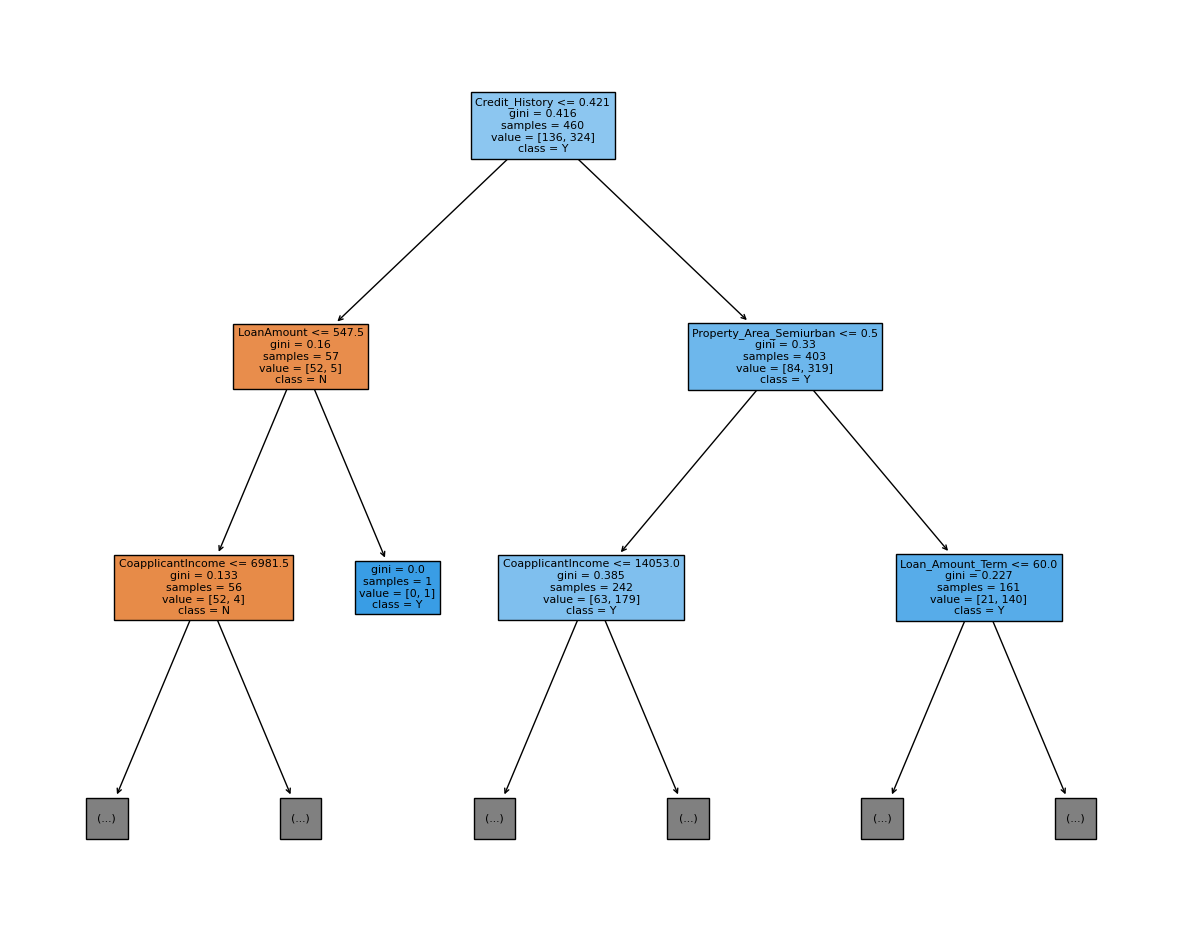

In [24]:
plt.figure(figsize=(15,12))
plot_tree(model,filled=True,max_depth=2,feature_names=X.columns,class_names=label_encoder.classes_)
plt.show()